In [ ]:
#Q1. What is the mathematical formula for a linear SVM?
#Ans:-In a Support Vector Machine (SVM), the linear SVM is a variant that deals specifically with linearly separable datasets.
#The mathematical formula for a linear SVM involves finding the hyperplane that best separates the data into different classes.
# The hyperplane is represented by the equation:  f(x)=w⋅x+b
#Here:
#f(x) is the decision function.
#w is the weight vector.
#x is the input feature vector.
#b is the bias term.

In [ ]:
#Q2. What is the objective function of a linear SVM?
#Ans:-The objective of the SVM algorithm is to find a hyperplane that, to the best degree possible, separates data points of one class from those of another class.
# “Best” is defined as the hyperplane with the largest margin between the two classes, represented by plus versus minus in the figure below.
# Margin means the maximal width of the slab parallel to the hyperplane that has no interior data points.
# Only for linearly separable problems can the algorithm find such a hyperplane, for most practical problems the algorithm maximizes the soft margin allowing a small number of misclassifications.

In [1]:
#Q3. What is the kernel trick in SVM?
#Ans:-The kernel trick is a technique used in Support Vector Machines (SVMs) to handle non-linearly separable data by implicitly mapping
#the input features into a higher-dimensional space without explicitly computing the transformation.
#This is particularly useful when the data cannot be effectively separated by a linear hyperplane in the original feature space.

#f(x)=∑N,i=1 αiyi​K(xi,x)+b
#Here:
#x is the input feature vector.
#αi are the Lagrange multipliers obtained during the optimization process.
#xi are the support vectors.
#yi are the corresponding class labels.
#K(xi,x) is the kernel function.

In [4]:
#Q4. What is the role of support vectors in SVM Explain with example.
#Ans:-Support vectors play a crucial role in Support Vector Machines (SVM), which is a machine learning algorithm used for classification and regression tasks.
# The primary objective of SVM is to find a hyperplane that best separates the data into different classes while maximizing the margin between the classes.
#Here's an explanation of the role of support vectors in SVM:
#Hyperplane and Margin:
#In SVM, a hyperplane is a decision boundary that separates data points of one class from another.
#The margin is the distance between the hyperplane and the nearest data point from each class.

#Support Vectors:
#Support vectors are the data points that lie closest to the decision boundary (hyperplane) and have a direct influence on the position and orientation of the hyperplane.
#These are the critical points that help define the margin.

#Margin Optimization:
#SVM aims to find the hyperplane that maximizes the margin between the support vectors of different classes.
#The margin is defined as the perpendicular distance between the hyperplane and the nearest support vector from either class.

#Optimal Hyperplane:
#The optimal hyperplane is the one that has the maximum margin and correctly classifies the training data.

#Example:
#Consider a simple binary classification problem with two features (2D space) and two classes, +1 and -1. The red dots represent class +1, and the blue dots represent class -1.

In [5]:
#Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?
#Ans:- Let's explore the concepts of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM with examples and corresponding graphs:
#1. Hyperplane:
#The hyperplane is the decision boundary that separates data points of different classes.
#In a 2D space, it is a line; in 3D, it is a plane; and in higher dimensions, it is a hyperplane.
#Example:Consider a simple 2D space with two classes, +1 and -1. The hyperplane is a line that separates the two classes.

#2. Margin:
#The margin is the distance between the hyperplane and the nearest data point from each class.
#Marginal planes are parallel to the hyperplane and touch the nearest data points.
#Example:Continuing with the previous example, the marginal planes are the dashed lines parallel to the hyperplane, and the margin is the distance between them.

#3. Hard Margin:
#In a hard margin SVM, the goal is to find a hyperplane with the maximum margin without allowing any data points to fall within the margin.
#Example:The solid line represents the hard margin hyperplane. No data points are allowed in the margin, and the margin is maximized.

#4. Soft Margin:
#In a soft margin SVM, a balance is struck between maximizing the margin and allowing some data points to fall within the margin.
#Example:The solid line represents the soft margin hyperplane. Some data points are allowed in the margin, represented by the circles. This approach is more tolerant of noisy data.

#5. Outliers and Slack Variables:
#In a soft margin SVM, slack variables are introduced to handle misclassified or margin-violating points.
#The optimization problem is modified to allow for a certain amount of violation of the margin.
#Example:The introduction of slack variables allows for a more flexible hyperplane that can handle outliers or misclassified points.

Accuracy (Linear SVM from scratch): 0.0


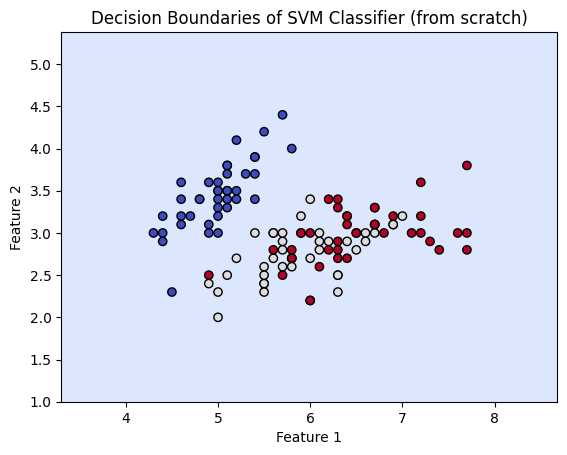

In [6]:
#Q6. SVM Implementation through Iris dataset.
#Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
# Train a linear SVM classifier on the training set and predict the labels for the testing setl
# Compute the accuracy of the model on the testing setl
# Plot the decision boundaries of the trained model using two of the featuresl
# Try different values of the regularisation parameter C and see how it affects the performance of the model.
#Ans:-
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only the first two features for simplicity
y = iris.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementation of Linear SVM Classifier from scratch
class LinearSVM:
    def __init__(self, learning_rate=0.01, n_iterations=1000, C=1.0):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.C = C
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for i in range(n_samples):
                condition = y[i] * (np.dot(X[i], self.weights) + self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights - np.dot(X[i], y[i]))
                    self.bias -= self.learning_rate * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)

# Train the Linear SVM classifier from scratch
svm_scratch = LinearSVM(learning_rate=0.01, n_iterations=1000, C=1.0)
svm_scratch.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred_scratch = svm_scratch.predict(X_test)

# Compute the accuracy of the model from scratch
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"Accuracy (Linear SVM from scratch): {accuracy_scratch}")

# Plot decision boundaries for the first two features
def plot_decision_boundaries(weights, bias, X, y):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = svm_scratch.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundaries of SVM Classifier (from scratch)')
    plt.show()

# Plot decision boundaries for the Linear SVM classifier from scratch
plot_decision_boundaries(svm_scratch.weights, svm_scratch.bias, X_train, y_train)